

# Project: Investigating the Movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Note**: This dataset was cleaned from Kaggle.It contains information of about 10,000 movies collected from the movie database (TMDb).
The dataset contains 21 columns containing information like the rate of popularity,budget for each movie,revebue gotten fro each movie,genre of each movie,runtime,release date and year,production companies and so on
In this project I would be looking at the factors that affects the revenue of the movies,factors like popularity and runtime.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#loading in the dataset and viewing the first sets of inputs
df_m = pd.read_csv('movies.csv')
df_m.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#looking at the last set of data
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#getting more information of the dataset
df_m.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


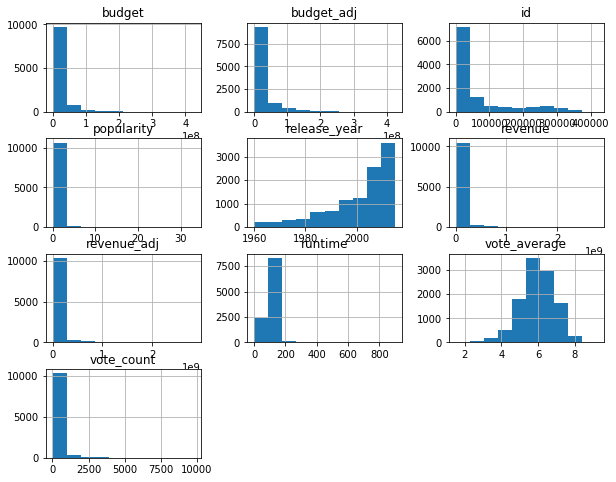

In [5]:
#plotting the histogram for each column 
df_m.hist(figsize = (10,8));

> **Note**: Viewing and exploring the dataset,I took note of the columns and the 10865 rows,I also noticed that they have correct data types.
### Data Cleaning
> **Note**: 
The dataset will be cleaned by dropping rows that are not needed,checking for duplicates,null values,replacing zero values.

In [6]:
#dropping columns that are not needed
df_m.drop(['id','imdb_id','original_title','cast','homepage','director','tagline','overview',
           'genres','production_companies','release_date','keywords'],axis=1,inplace=True)

In [7]:
#viewing the new dataset
df_m.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
#checking for null values and dtypes
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   runtime       10866 non-null  int64  
 4   vote_count    10866 non-null  int64  
 5   vote_average  10866 non-null  float64
 6   release_year  10866 non-null  int64  
 7   budget_adj    10866 non-null  float64
 8   revenue_adj   10866 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 764.1 KB


In [9]:
#checking for zero values
df_m.isin([0]).sum()

popularity         0
budget          5696
revenue         6016
runtime           31
vote_count         0
vote_average       0
release_year       0
budget_adj      5696
revenue_adj     6016
dtype: int64

In [10]:
#replacing all 0 values in all columns with the mean
df_m['budget']=df_m['budget'].replace(0,df_m['budget'].mean())
df_m['revenue']=df_m['revenue'].replace(0,df_m['revenue'].mean())
df_m['budget_adj']=df_m['budget_adj'].replace(0,df_m['budget_adj'].mean())
df_m['revenue_adj']=df_m['revenue_adj'].replace(0,df_m['revenue_adj'].mean())


In [11]:
#confirming if it worked
df_m.tail()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,0.080598,1.462570e+07,3.982332e+07,95,11,7.4,1966,1.755104e+07,5.136436e+07
10862,0.065543,1.462570e+07,3.982332e+07,176,20,5.7,1966,1.755104e+07,5.136436e+07
10863,0.065141,1.462570e+07,3.982332e+07,94,11,6.5,1966,1.755104e+07,5.136436e+07
10864,0.064317,1.462570e+07,3.982332e+07,80,22,5.4,1966,1.755104e+07,5.136436e+07
10865,0.035919,1.900000e+04,3.982332e+07,74,15,1.5,1966,1.276423e+05,5.136436e+07


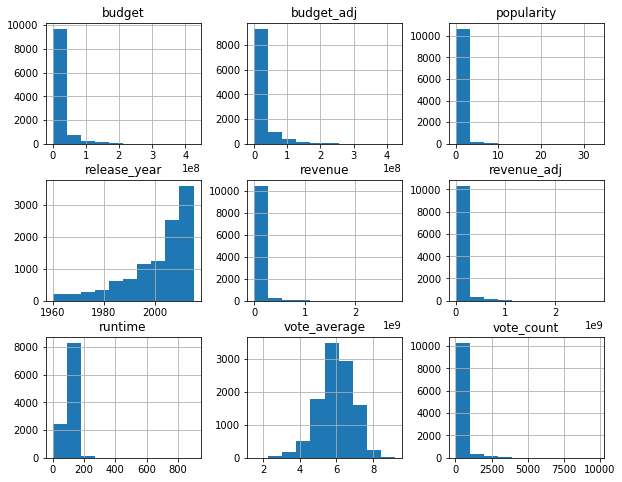

In [12]:
#checking if the change affected the histogram
df_m.hist(figsize = (10,8));

In [13]:

df_m.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,2.229255e+07,6.187164e+07,102.070863,217.389748,5.974922,2001.322658,2.675136e+07,7.980243e+07
std,1.000185,2.801245e+07,1.110204e+08,31.381405,575.619058,0.935142,12.812941,3.050850e+07,1.365610e+08
min,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207583,1.462570e+07,3.982332e+07,90.000000,17.000000,5.400000,1995.000000,1.755104e+07,5.136436e+07
50%,0.383856,1.462570e+07,3.982332e+07,99.000000,38.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07
75%,0.713817,1.500000e+07,3.982332e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,5.136436e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: How does popularity affect the revenue?

In [14]:
# Finding the median of popularity in order to group into high and low popularity
df_m.popularity.median()

0.3838555

In [15]:
low_pop = df_m.query('popularity < 0.383856')
high_pop = df_m.query('popularity >= 0.383856')
entries = df_m.shape[0]
entries == low_pop['revenue'].count() + high_pop['revenue'].count()

True

In [16]:
mean_low_pop = low_pop.revenue.mean()


In [17]:
mean_high_pop = high_pop.revenue.mean()


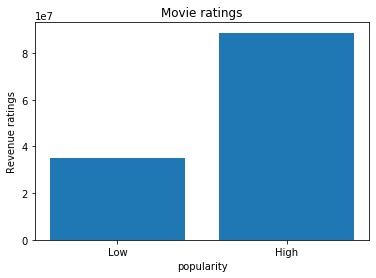

In [18]:
# Creating a bar chart with proper labels
locations = [1, 2]
heights = [mean_low_pop, mean_high_pop]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Movie ratings')
plt.xlabel('popularity')
plt.ylabel('Revenue ratings');

> ****:The above barchart shows the popularity against revenue.It is depicting the fact that popularity is a major factor affecting revenue.In the sense that low popularity of a movie brings low revenue and high popularity brings high revenue.

### Research Question 2: How does runtime of the movie affect revenue?

In [19]:
#The median of runtime
df_m.runtime.median()

99.0

In [20]:
#sectioning it to low and high
low_time = df_m.query('runtime < 99.0')
high_time = df_m.query('runtime >= 99.0')
runtime = df_m.shape[0]
runtime == low_time['revenue'].count() + high_time['revenue'].count()

True

In [21]:
mean_low_time = low_time.revenue.mean()


In [22]:
mean_high_time = high_time.revenue.mean()


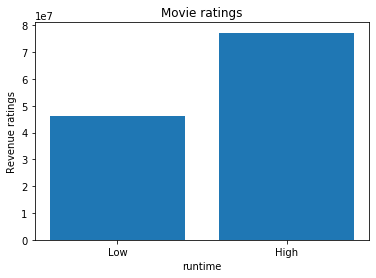

In [23]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_low_time, mean_high_time]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Movie ratings')
plt.xlabel('runtime')
plt.ylabel('Revenue ratings');

> ****:The above barchart shows runtime against revenue.It is depicting the fact that the time duration of a movie is a major factor affecting revenue.In the sense that low runtime  of a movie brings low revenue and high runtime brings high revenue.

<a id='conclusions'></a>
## Conclusions

> **Note**: From the analysis of the TDMb dataset above,using revenue as the dependent variable because everyone would like to know what exactly fetches more revenue for a particular production,I was able to get some factors affecting the revenue as independent variables like popularity and runtime.It was concluded that in order to make a movie that would bring much revenue it is advisabe to make the movie more popular and has more duration.
## Limitations

>One of the limitations encountered was the huge zero inputs in columns like revenue and runtime  which would have given a wrong analysis if skipped or not properly cleaned



> Another problem encountered were some missing values in columns which would have also given a wrong analysis if used that way
 

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0